In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
x_train = np.array(x_train).reshape(x_train.shape[0], 28, 28, 1)
x_test =np.array(x_test).reshape(x_test.shape[0], 28, 28, 1)

Index:  43
Actual value : 9


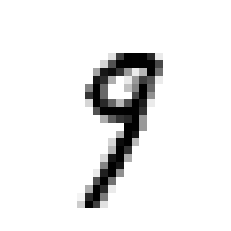

In [4]:
import random

index = random.randint(0,60)
sd=X.iloc[index]
dd=np.asarray(sd).reshape(28,28)
print('Index: ', index)
print('Actual value :', y[index])
plt.imshow(dd,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
from collections import Counter

import numpy as np

from decision_tree import DecisionTree


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)




In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

print("Model Builded..")

Model Builded..


In [13]:
clf.fit(np.array(x_train).reshape(x_train.shape[0], 28*28), y_train)